# Residual Analysis

***Residual Analysis***

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

# Split data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [103]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
#Residuals = actual - predicted
residuals = y_test - y_pred

In [9]:
#Quick Peek
print("\nFirst 5 Residuals")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':y_pred[:5]
                   }))


First 5 Residuals
        Actual  Predicted  Residual
20046  0.47700   0.719123  0.719123
3024   0.45800   1.764017  1.764017
15663  5.00001   2.709659  2.709659
20484  2.18600   2.838926  2.838926
9814   2.78000   2.604657  2.604657


-**Positive Residual** :model unpredicted
-**negative Residual**: model predicted

# Residuals vs predicted vlaues

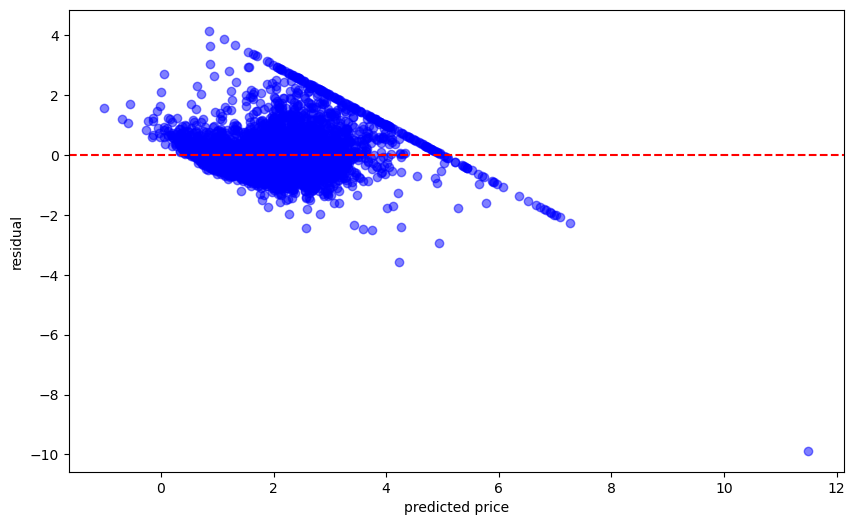

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle="--")
plt.xlabel("predicted price")
plt.ylabel('residual')
plt.show()

Q-Q plot for normality check


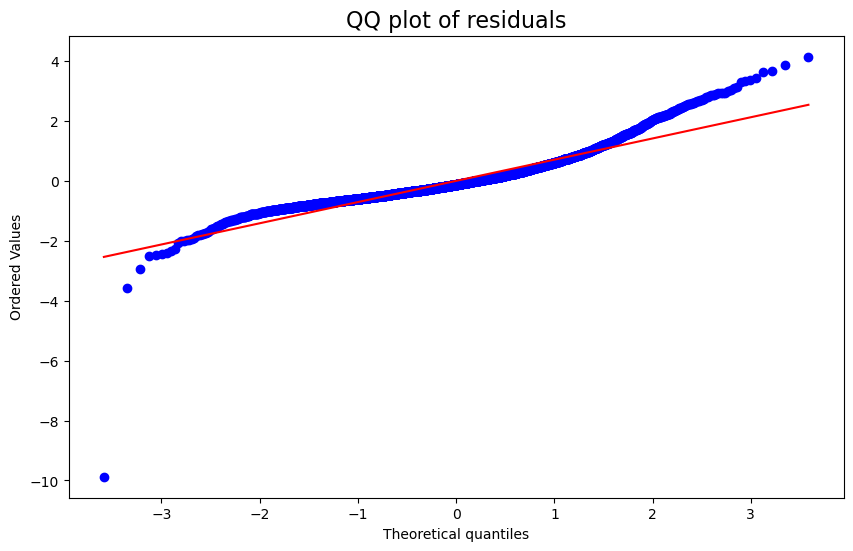

In [19]:

import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title((((("QQ plot of residuals",fontsize=16)
plt.show()))))

step 4

- linearity : scatter plot shows no curve-assumtions holds decently

* constant values: slight fanning at higher prices -mild heteroscedacity
 
- Normality:histogram and QQ polot show approximate normality

# standardization vs Normalization 

used to scale scale numeric values




#### standardization

###### fromula: x-U/sigma

#### Normalization

 ### formula: x-x_min/x_max-x_min

##### why use cross validation 
- prevents i=over fitting intop k folads
- train the model on k-1 foalds and test on the remaining fold 
- repeat the process k times each time using different fold as the test set
- compute the average performance across all the iterations

In [102]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression


x,y=make_regression(n_samples=100,n_features=2,noise=10)

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,x,y,cv=kf,scoring='r2')
print("cross validation scores:",scores )

print("Average scores:",scores.mean())

cross validation scores: [0.99147294 0.98063426 0.99264174 0.98777698 0.99245421]
Average scores: 0.9889960245710018
